## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score



%matplotlib inline

## Load the Data

In [4]:
df = pd.read_csv("cleaned_plyear_data.csv")

In [5]:
df

,Team,Position,Height,Age,Appearances,Goals,Assists,Yellow_Cards,Second_Yellow_Cards,Red_Cards,Goals_Conceded,Clean_Sheets,Minutes_Played,Days_Injured,Games_Injured,Award,Current_Value,Highest_Value,Position_Encoded,Winger
0,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
2,Manchester United,Defender Centre-Back,185.000000,31.0,8,0.000000,0.000000,0.216346,0.0,0.000000,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
3,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
4,Manchester United,Defender Left-Back,169.000000,23.0,89,0.012619,0.063096,0.227145,0.0,0.000000,0.000000,0.000000,7132,182,15,3,22000000,22000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10299,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10300,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10301,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [6]:
df.shape

(10303, 20)

In [7]:
df.head()

,Team,Position,Height,Age,Appearances,Goals,Assists,Yellow_Cards,Second_Yellow_Cards,Red_Cards,Goals_Conceded,Clean_Sheets,Minutes_Played,Days_Injured,Games_Injured,Award,Current_Value,Highest_Value,Position_Encoded,Winger
0,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
2,Manchester United,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0,0.0,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
3,Manchester United,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
4,Manchester United,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.000000,0.000000,7132,182,15,3,22000000,22000000,2,1


## Preprocess the Data

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

### Aggregat
Aggregating  categorical feature

In [12]:
categorical_features = ['Team',  'Position']
categorical_features

['Team', 'Position']

In [13]:
df.shape

(10303, 20)

### One hot coding

In [15]:
df = pd.get_dummies(df, columns=categorical_features)

In [16]:
df.shape

(10303, 405)

In [17]:
df.head()

,Height,Age,Appearances,Goals,Assists,Yellow_Cards,Second_Yellow_Cards,Red_Cards,Goals_Conceded,Clean_Sheets,...,Position_Attack-SecondStriker,Position_Defender Centre-Back,Position_Defender Left-Back,Position_Defender Right-Back,Position_Goalkeeper,Position_midfield-AttackingMidfield,Position_midfield-CentralMidfield,Position_midfield-DefensiveMidfield,Position_midfield-LeftMidfield,Position_midfield-RightMidfield
0,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,True,False,False,False,False,False
1,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,True,False,False,False,False,False
2,185.0,31.0,8,0.000000,0.000000,0.216346,0.0,0.0,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False
3,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False
4,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,False


### Feature selection
selecting  features  that make more impact on true value

In [19]:
Current_Value_correlation = df.corr()
print(Current_Value_correlation['Current_Value'].sort_values(ascending=False))

Current_Value                1.000000
Highest_Value                0.798697
Appearances                  0.440829
Minutes_Played               0.426450
Award                        0.151642
                               ...   
Team_Royal AM FC            -0.032217
Team_Daejeon Hana Citizen   -0.033016
Goals_Conceded              -0.077364
Age                         -0.080131
Position_Goalkeeper         -0.100477
Name: Current_Value, Length: 405, dtype: float64


In [20]:
threshold = 0.12
selected_features = Current_Value_correlation[abs(Current_Value_correlation['Current_Value']) > threshold]['Current_Value'].index
selected_features

Index(['Appearances', 'Minutes_Played', 'Award', 'Current_Value',
       'Highest_Value', 'Team_Leeds United', 'Team_Southampton FC'],
      dtype='object')

In [21]:
selected_features =['Appearances', 'Minutes_Played', 'Award', 'Current_Value',
       'Highest_Value', 'Team_Leeds United', 'Team_Southampton FC']

In [22]:
df = df[selected_features]
df.head()

,Appearances,Minutes_Played,Award,Current_Value,Highest_Value,Team_Leeds United,Team_Southampton FC
0,15,1304,1,1500000,22000000,False,False
1,4,292,4,600000,6000000,False,False
2,8,416,7,2000000,20000000,False,False
3,34,2758,0,2000000,2000000,False,False
4,89,7132,3,22000000,22000000,False,False


### Prepare train and test data
Prepare and divide data into training data and test data.

In [24]:
X = df.drop(['Current_Value'], axis=1)
y = df['Current_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [25]:
X.shape

(10303, 6)

### Buliding the Model
Bulid a Linear Regression Model

In [27]:
model = LinearRegression()

In [28]:
ridge_model = Ridge()  

In [29]:
lasso_model = Lasso() 

In [30]:
param_grid = {
    'alpha': [ 0.0002, 0.001, 0.01, 0.5, 1, 5,9,8]  
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

### Training the model by fit train data

In [32]:

model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [34]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [35]:
grid_search_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0002, 0.001, 0.01, 0.5, 1, 5, 9, 8]},
             scoring='neg_mean_squared_error', verbose=1)

In [36]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0002, 0.001, 0.01, 0.5, 1, 5, 9, 8]},
             scoring='neg_mean_squared_error', verbose=1)

#### Test the Model
##### Make a Predict 

In [38]:
y_pred = model.predict(X_test_scaled)

####  Interpretation of the Model

In [40]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Appearances,-3.327706e+05
Minutes_Played,8.815253e+05
Award,-6.798694e+05
Highest_Value,3.431131e+06
Team_Leeds United,1.918699e+05
Team_Southampton FC,1.401837e+05


In [41]:
print(model.intercept_) 

2359541.980101917


In [42]:
coeff_dff = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_dff

,Coefficient
Appearances,-3.327515e+05
Minutes_Played,8.815071e+05
Award,-6.798678e+05
Highest_Value,3.431128e+06
Team_Leeds United,1.918691e+05
Team_Southampton FC,1.401829e+05


### Test Accuracy

In [44]:
score = model.score(X_test_scaled, y_test)
score

0.666327869121647

### Evaluating the Model

#### Mean Square Error MSE


In [47]:
y_base = [y_train.mean()] * len(y_test)

In [48]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 17819588066402.58


In [49]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 5801018084029.445
Mean Squared Error for testing: 5945038303763.267


#### Mean Absolute Error MAE

In [51]:
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2540474.1801292086


In [52]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1292178.1804963055
Mean Absolute Error for testing: 1323664.1171793083


#### Root Mean Squared Error 

In [54]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1593.8865016459638


In [55]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2408530.2746757087
Root Mean Squared Error for testing: 2438244.9228416877


#### R Square

In [57]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6814691130538483
R Square for testing: 0.666327869121647


### Predictions vs. Real Values

In [59]:
predictions = model.predict(X_test_scaled)

In [60]:
Real_Values = np.array(y_test)

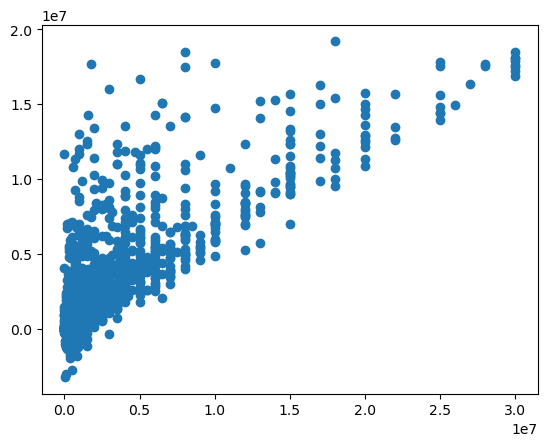

In [61]:
plt.scatter(Real_Values,predictions); 

### Residual Histogram

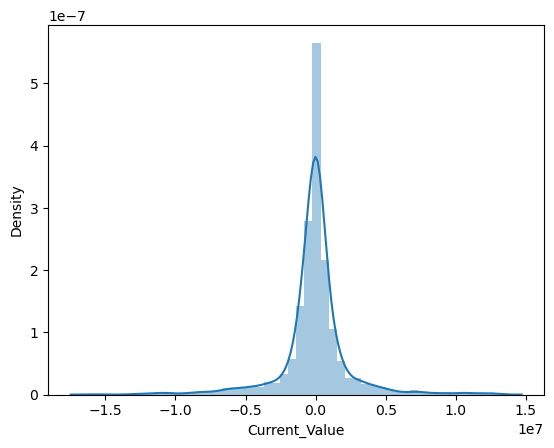

In [63]:
sns.distplot((y_test-predictions),bins=50); 